# Dealing with Missing Data

This notebook will review ways to deal with missing data in a pandas dataframe. 

Missing data in Python is represented by NaNs (Not a Number) or `None`. 

Most machine learning models and visualizations will fail if missing data is present.

To avoid this, missing data may be dropped or imputed so that it is not missing.

The goal is usually to retain as much data as possible.

Overview:
* Identify missing data
* Drop or impute missing values
* Check data manipulations

See the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) for more information. 

See the [Missingno Documentation](https://github.com/ResidentMario/missingno) for more information on that package.

Requirements:

`pip install pandas`

`pip install missingno`

In [51]:
# import packages
import pandas as pd
import missingno as msno 

In [52]:
# read in data
df = pd.read_csv('../Data/anime.csv')

In [53]:
# Check shape of data
## Should be 6668 rows and 33 columns
df.shape

(6668, 33)

In [54]:
# Summarize info with df.info()
# Notice the count of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   title_english    3438 non-null   object 
 3   title_japanese   6663 non-null   object 
 4   title_synonyms   4481 non-null   object 
 5   image_url        6666 non-null   object 
 6   type             6668 non-null   object 
 7   source           6668 non-null   object 
 8   episodes         6668 non-null   int64  
 9   status           6668 non-null   object 
 10  airing           6668 non-null   bool   
 11  aired_string     6668 non-null   object 
 12  aired            6668 non-null   object 
 13  duration         6668 non-null   object 
 14  rating           6668 non-null   object 
 15  score            6668 non-null   float64
 16  scored_by        6668 non-null   int64  
 17  rank          

# Check Missing Data

In [55]:
# pd.isna() will return True if a NaN value is found and False otherwise
pd.isna(df)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,False,False,True,False,True,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
6664,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
6665,False,False,True,False,True,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
6666,False,False,False,False,True,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False


In [56]:
# You can call a sum on is na to get a total count of missing values for a df or column
pd.isna(df['rank']).sum()

356

In [57]:
# You can call a sum on is na to get a total count of missing values for a df or column
pd.isna(df).sum()

anime_id              0
title                 0
title_english      3230
title_japanese        5
title_synonyms     2187
image_url             2
type                  0
source                0
episodes              0
status                0
airing                0
aired_string          0
aired                 0
duration              0
rating                0
score                 0
scored_by             0
rank                356
popularity            0
members               0
favorites             0
background         5855
premiered          3702
broadcast          3688
related               0
producer           2266
licensor           3881
studio                0
genre                 4
opening_theme         0
ending_theme          0
duration_min          0
aired_from_year       0
dtype: int64

## Plot missing values

<AxesSubplot:>

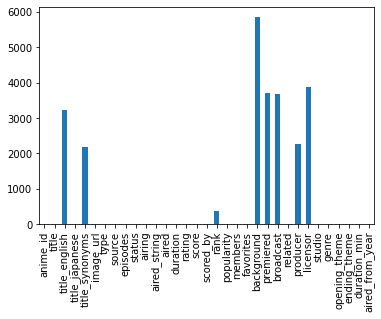

In [58]:
# Get a count of null values and plot the sum
df.isnull().sum().plot(kind='bar')

## Missingno library

A useful library to get visualizations of missing data

<AxesSubplot:>

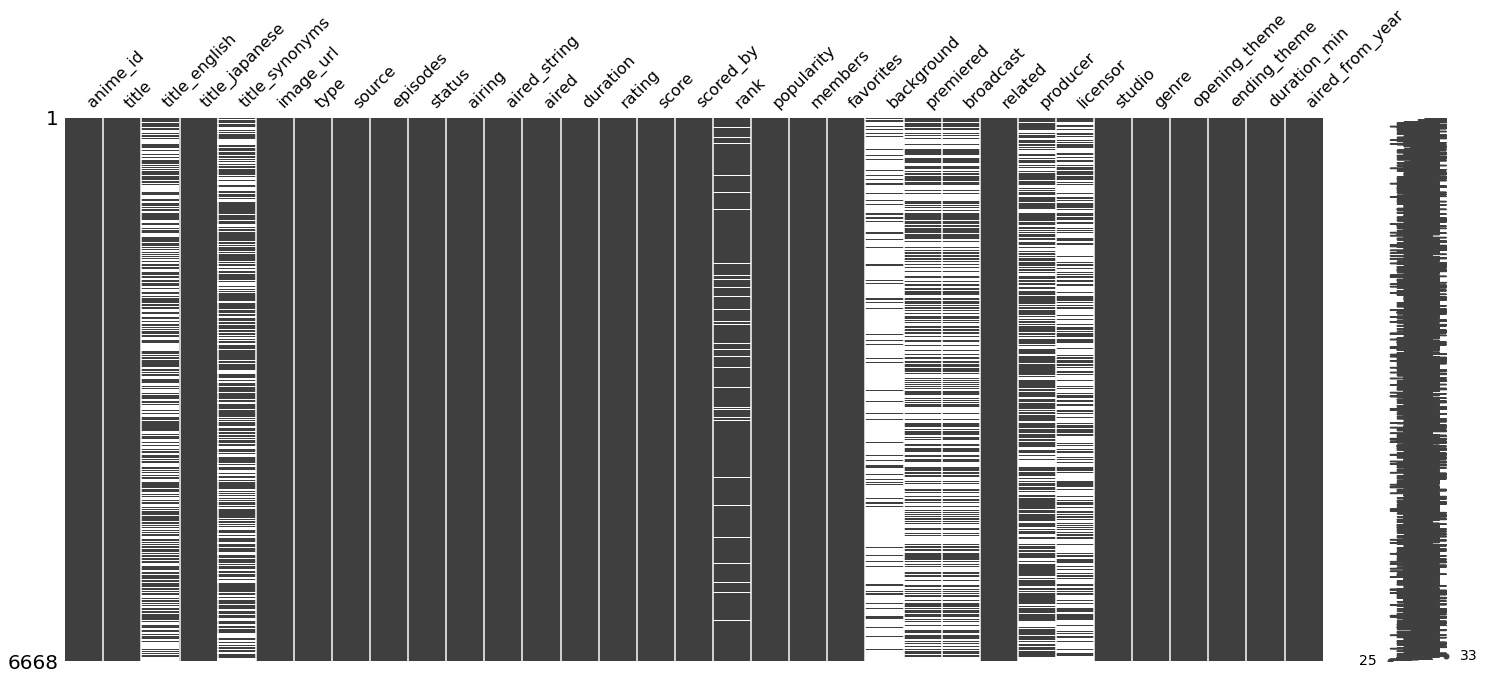

In [59]:
msno.matrix(df)

<AxesSubplot:>

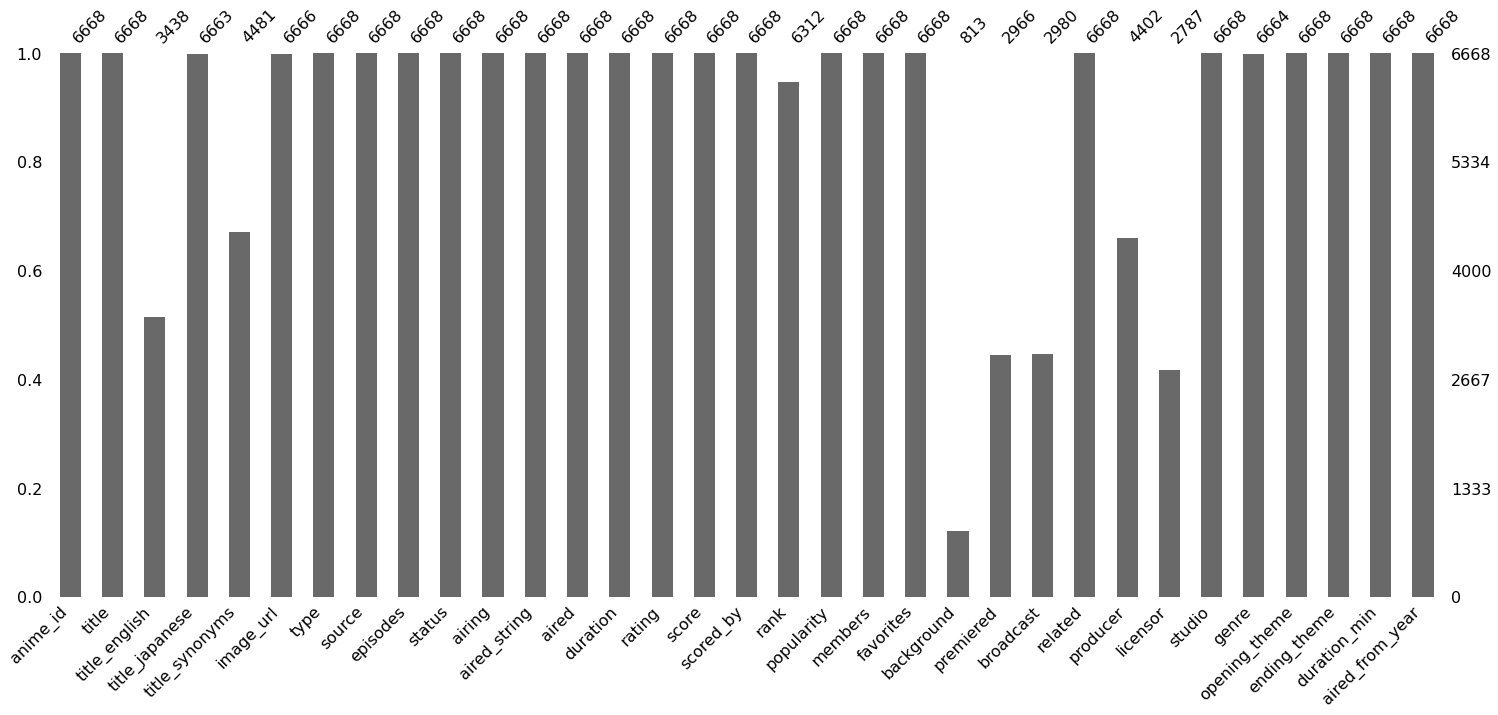

In [60]:
msno.bar(df)

<AxesSubplot:>

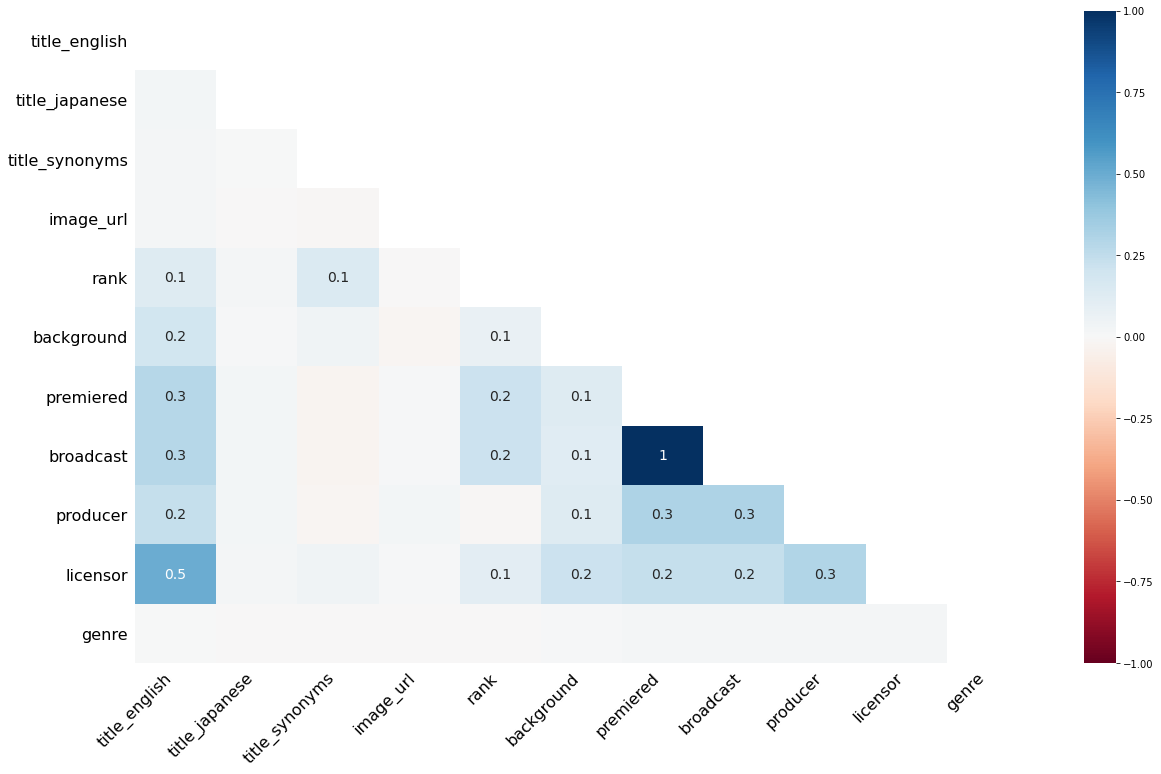

In [61]:
## correlation of missing values across the different columns
## example: column x has missing data, and we want to see how that influences column y
msno.heatmap(df)
## notice broadcast and premiered are 100% - meaning that the missing vaslues predict the other column 100% of the time
## no premier means no broadcast, and vice versa

## Drop all rows with a NaN value

In [62]:
# Drop NaNs and return new dataframe
df2 = df.dropna()

In [63]:
# Check how much data was lost
## Notice, we're down to 282 rows-that is a LOT of dropped data
df2.shape

(282, 33)

## Drop all Columns with Missing values

In [64]:
# Drop cols with NaNs and return new df
df3 = df.dropna(axis=1)

In [65]:
# Check how much data was lost
## Notice, we dropped cols this time and still have the original number of rows
df3.shape

(6668, 22)

## Drop selected columns

In [66]:
# Drop selected column and return new df
df4 = df.drop(columns=['background'])

In [67]:
# Check the df cols to see that it was dropped
df4.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year'],
      dtype='object')

## Fill NaNs with a value

In [68]:
# Lets focus on df['rank'] and replace the NaN values in that col
df['rank'].describe()

count     6312.000000
mean      4327.645120
std       3170.699074
min          1.000000
25%       1710.750000
50%       3754.500000
75%       6338.500000
max      12856.000000
Name: rank, dtype: float64

In [69]:
# Create a new column with NaNs filled by mean value
df['rank_filled'] = df['rank'].fillna(df['rank'].mean())

In [70]:
# Check new column-notice count has changed from above
df['rank_filled'].describe()

count     6668.000000
mean      4327.645120
std       3084.884357
min          1.000000
25%       1825.750000
50%       4000.000000
75%       6184.500000
max      12856.000000
Name: rank_filled, dtype: float64

In [71]:
# Create a new column with NaNs filled with a 0
df['rank_filled_0'] = df['rank'].fillna(0)

In [72]:
# Check new column-notice count has changed from above
df['rank_filled_0'].describe()

count     6668.000000
mean      4096.595081
std       3234.682662
min          0.000000
25%       1401.500000
50%       3504.500000
75%       6184.500000
max      12856.000000
Name: rank_filled_0, dtype: float64

In [73]:
# Fill genre with most common
df['genre_filled'] = df['genre'].fillna(df['genre'].value_counts().index[0])

In [74]:
# Fill genre with most common
df['genre_filled'].describe()

count       6668
unique      3203
top       Hentai
freq         248
Name: genre_filled, dtype: object

# Final Tips and Tricks

Remember, when cleaning missing data, you usually want to retain as much info/data as possible.

For continous values, it may make sense to fill NaNs with a mean value.

For categorial values, you can consider filling NaNs with the most common category. 

But always use your judgement, if half of the data is missing, imputation may not be meaningful.